# Trabalho Final de Processamento de Linguagem Natural
by Lisle, Alana e Giovanna

### Imports

In [2]:
#Imports

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.backend import clear_session
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import layers
import pandas as pd

%matplotlib inline


In [3]:
print(keras.__version__)

2.4.3


### Funcoes uteis

In [84]:
def writeToText(text, name):
    f = open(name, 'a+')
    f.write(text)
    f.close()

In [85]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

### Carregando dados 

In [86]:
## Loading data

df = pd.read_csv('balanced_dataset.csv')

text = df['Text'].values.tolist()
label = df['Label'].values.tolist()


### Train test split

In [87]:
tweets = df['Text'].values
y = df['Label'].values

tweets_train, tweets_test, y_train, y_test = train_test_split(tweets, y, test_size = 0.25, random_state=1000)
tweets_train, tweets_val, y_train, y_val =  train_test_split(tweets_train, y_train, test_size = 0.25, random_state=1000)

### Vetorizando dados

In [88]:
## Vectorize sentences

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(tweets_train)

X_train = vectorizer.transform(tweets_train)
X_test = vectorizer.transform(tweets_test)
X_val = vectorizer.transform(tweets_val)

X_train

<1949x6619 sparse matrix of type '<class 'numpy.int64'>'
	with 26346 stored elements in Compressed Sparse Row format>

In [89]:
vectorizer.transform(text).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Implementando classificador linear

In [90]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)

print("Accuracy: ", score)

Accuracy:  0.9238754325259516


In [91]:
y_pred = classifier.predict(X_test)

m = confusion_matrix(y_test, y_pred, labels=[0, 1])
tp = m[1,1]
fn = m[1,0]
tn = m[0,0]
fp = m[0,1]

acc = (tp + tn)/(tp + tn + fp + fn)
sen = tp/(tp + fn)
pre = tp/(tp + fp)
esp = tn/(tn + fp)
f1 = (2*pre*sen)/(pre+sen)

print("Acuracia: " + str(acc) + ", Sensibilidade: " + str(sen) + ", Precisao: " + str(pre) + ", Especificidade: " + str(esp) + ", F1-score: " + str(f1))
writeToText("Regressao Logistica\n" + "Acuracia: " + str(acc) + ", Sensibilidade: " + str(sen) + ", Precisao: " + str(pre) + ", Especificidade: " + str(esp) + ", F1-score: " + str(f1) + '\n',
           'results.txt')
m

Acuracia: 0.9238754325259516, Sensibilidade: 0.8771498771498771, Precisao: 0.9571045576407506, Especificidade: 0.9652173913043478, F1-score: 0.9153846153846154


array([[444,  16],
       [ 50, 357]], dtype=int64)

### Implementando model deep

In [92]:
input_dim = X_train.shape[1] #Numero de features

model = Sequential()
model.add(layers.Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [93]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                66200     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 66,211
Trainable params: 66,211
Non-trainable params: 0
_________________________________________________________________


In [94]:
## Para limpar pesos do modelo
#clear_session()

In [95]:
h = model.fit(X_train, y_train,
             epochs = 100,
             verbose = False,
             validation_data = (X_val, y_val),
             batch_size = 10)

In [96]:
y_pred = model.predict_classes(X_test)

m = confusion_matrix(y_test, y_pred, labels=[0, 1])
tp = m[1,1]
fn = m[1,0]
tn = m[0,0]
fp = m[0,1]

acc = (tp + tn)/(tp + tn + fp + fn)
sen = tp/(tp + fn)
pre = tp/(tp + fp)
esp = tn/(tn + fp)
f1 = (2*pre*sen)/(pre+sen)

writeToText("One layer deep\n" + "Acuracia: " + str(acc) + ", Sensibilidade: " + str(sen) + ", Precisao: " + str(pre) + ", Especificidade: " + str(esp) + ", F1-score: " + str(f1) + '\n',
           'results.txt')
print("Acuracia: " + str(acc) + ", Sensibilidade: " + str(sen) + ", Precisao: " + str(pre) + ", Especificidade: " + str(esp) + ", F1-score: " + str(f1))
m

Acuracia: 0.916955017301038, Sensibilidade: 0.8697788697788698, Precisao: 0.9490616621983914, Especificidade: 0.9586956521739131, F1-score: 0.9076923076923077


array([[441,  19],
       [ 53, 354]], dtype=int64)

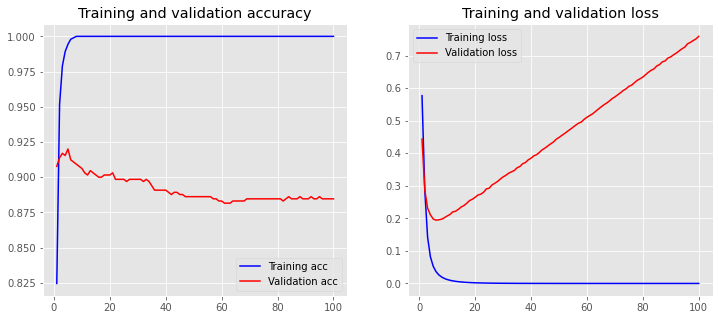

In [97]:
plot_history(h)

### Implementando CNN

In [102]:

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets_train)

X_train = tokenizer.texts_to_sequences(tweets_train)
X_test = tokenizer.texts_to_sequences(tweets_test)
X_val = tokenizer.texts_to_sequences(tweets_val)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(tweets_train[2])
print(X_train[2])

HAPPY FUCKING BIRTHDAY YA PONGO! :)
[443, 64, 1263, 214, 2080]


In [105]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [118]:

embedding_dim = 100

cnn = Sequential()
cnn.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
cnn.add(layers.Conv1D(128, 5, activation='relu'))
cnn.add(layers.GlobalMaxPooling1D())
cnn.add(layers.Dense(10, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          608400    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 673,829
Trainable params: 673,829
Non-trainable params: 0
_________________________________________________________________


In [119]:
h = cnn.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_val, y_val),
                    batch_size=10)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"(<class 'list'> containing values of types set())", '(<class \'list\'> containing values of types {"<class \'int\'>"})'}), <class 'numpy.ndarray'>

In [112]:
y_pred = cnn.predict_classes(X_test)

m = confusion_matrix(y_test, y_pred, labels=[0, 1])
tp = m[1,1]
fn = m[1,0]
tn = m[0,0]
fp = m[0,1]

acc = (tp + tn)/(tp + tn + fp + fn)
sen = tp/(tp + fn)
pre = tp/(tp + fp)
esp = tn/(tn + fp)
f1 = (2*pre*sen)/(pre+sen)

writeToText("CNN\n" + "Acuracia: " + str(acc) + ", Sensibilidade: " + str(sen) + ", Precisao: " + str(pre) + ", Especificidade: " + str(esp) + ", F1-score: " + str(f1) + '\n',
           'results.txt')
print("Acuracia: " + str(acc) + ", Sensibilidade: " + str(sen) + ", Precisao: " + str(pre) + ", Especificidade: " + str(esp) + ", F1-score: " + str(f1))
m

Acuracia: 0.9319492502883506, Sensibilidade: 0.8845208845208845, Precisao: 0.967741935483871, Especificidade: 0.9739130434782609, F1-score: 0.9242618741976893


array([[448,  12],
       [ 47, 360]], dtype=int64)

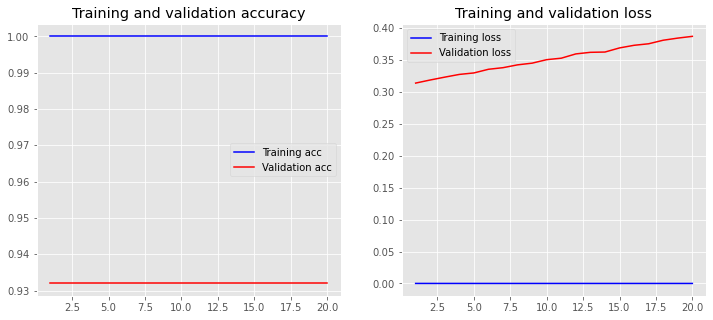

In [113]:
plot_history(h)